# **Real Estate Price Prediction using Linear Regression**
## Nama Anggota:
## 1. Agustinus Angelo Christian Fernando - 21/473804/TK/52235
## 2. Aufa Nasywa Rahman - 21/475255/TK/52454
## 3. Ahmad Zaki Akmal - 21/480179/TK/52981

# **Deskripsi Data**
#### Sumber Dataset: https://github.com/Codecademy/datasets/tree/master/streeteasy
#### Dataset ini berisi tentang data bangunan di wilayah Queens, New York.
#### Dataset ini diambil oleh StreetEasy yang merupakan salah satu marketplace Real Estate terbesar di New York. 
#### Bangunan yang ada di sini beragam, mulai dari yang tipe studio sampai bangunan besar bertingkat.
#### Ada 448 data bangunan di dataset ini


# **Deskripsi setiap feature:**
#### `rental_id` | Id setiap penyewaan
#### `rent` | Harga sewa bangunan dalam mata uang Dollar Amerika.
#### `bedrooms` | Jumlah kamar tidur di bangunan tersebut.
#### `bathrooms` | Jumlah kamar mandi di bangunan tersebut.
#### `size_sqft` | Luas bangunan dalam satuan square feet.
#### `min_to_subway` | Waktu yang dibutuhkan untuk ke subway (dalam satuan menit)
#### `floor` | lantai yang disewakan
#### `building_age_yrs` | Umur bangunan tersebut
#### `no_fee` | Apakah ada fee untuk broker? (0 jika ada, 1 jika tidak ada)
#### `has_roofdeck` | Apakah ada roof deck? (0 jika tidak ada, 1 jika ada)
#### `has_washer_dryer` | Apakah ada washer atau dryer? (0 jika tidak ada, 1 jika ada)
#### `has_doorman` | Apakah ada doorman? (0 jika tidak ada, 1 jika ada)
#### `has_elevator` | Apakah ada elevator? (0 jika tidak ada, 1 jika ada)
#### `has_dishwasher` | Apakah ada pencuci piring? (0 jika tidak ada, 1 jika ada)
#### `has_patio` | Apakah ada teras? (0 jika tidak ada, 1 jika ada)
#### `has_gym` | Apakah ada gym? (0 jika tidak ada, 1 jika ada)
#### `neighborhood` | Nama daerah tempat bangunan berada
#### `borough` | Nama borough tempat bangunan berada

In [ ]:
# Import Package yang dibutuhkan
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Import sklearn khusus untuk splitting data
from sklearn.model_selection import train_test_split 

# **Data PreProcessing, Data Cleaning, dan EDA**

In [ ]:
# Mendownload dataset dari sumber data
!wget https://raw.githubusercontent.com/Codecademy/datasets/master/streeteasy/queens.csv -O data.csv

--2023-03-30 06:42:33--  https://raw.githubusercontent.com/Codecademy/datasets/master/streeteasy/queens.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28855 (28K) [text/plain]
Saving to: ‘data.csv’

data.csv            100%[===================>]  28.18K  --.-KB/s    in 0.003s  

2023-03-30 06:42:33 (10.7 MB/s) - ‘data.csv’ saved [28855/28855]



In [ ]:
# Membaca dan menampilkan dataset
df = pd.read_csv('data.csv')
df.head(5)

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,10234,3000,3.0,1,1000,4,1.0,106,0,0,0,0,0,0,0,0,Astoria,Queens
1,10524,1950,1.0,1,950,1,3.0,83,0,0,0,0,0,0,0,0,Forest Hills,Queens
2,5465,3500,1.0,1,996,9,7.0,3,1,0,0,0,0,0,0,0,Astoria,Queens
3,5259,1725,1.0,1,800,1,2.0,89,0,0,0,0,0,0,0,0,Astoria,Queens
4,9736,1700,1.0,1,730,10,3.0,7,0,0,0,0,0,0,0,0,Briarwood,Queens


In [ ]:
# Mengecek apakah ada value yang null
df.isnull().sum()

rental_id           0
rent                0
bedrooms            0
bathrooms           0
size_sqft           0
min_to_subway       0
floor               0
building_age_yrs    0
no_fee              0
has_roofdeck        0
has_washer_dryer    0
has_doorman         0
has_elevator        0
has_dishwasher      0
has_patio           0
has_gym             0
neighborhood        0
borough             0
dtype: int64

Tampak bahwa tidak ada value yang null

In [ ]:
# Melihat deskripsi data
df.describe()

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym
count,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000
mean,6107.640625,2516.147321,1.327009,1.160714,811.841518,6.743304,5.626116,44.645089,0.441964,0.062500,0.055804,0.089286,0.078125,0.066964,0.024554,0.051339
std,2977.197967,854.612400,0.822425,0.402533,239.367987,6.500986,5.635582,35.852375,0.497176,0.242332,0.229799,0.285474,0.268668,0.250240,0.154933,0.220936
min,70.000000,1250.000000,0.000000,0.000000,340.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3635.250000,1900.000000,1.000000,1.000000,650.000000,3.000000,2.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6211.000000,2350.000000,1.000000,1.000000,787.000000,5.000000,3.500000,53.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8523.500000,2950.000000,2.000000,1.000000,965.250000,9.000000,6.000000,85.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11320.000000,8000.000000,4.000000,3.000000,2000.000000,51.000000,29.000000,126.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Tampak bahwa harga sewa rumah ada di antara 1250 dollar sampai 8000 dollar

In [ ]:
# Melihat info dataset dan melihat jenis tipe data setiap featurenya
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448 entries, 0 to 447
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rental_id         448 non-null    int64  
 1   rent              448 non-null    int64  
 2   bedrooms          448 non-null    float64
 3   bathrooms         448 non-null    int64  
 4   size_sqft         448 non-null    int64  
 5   min_to_subway     448 non-null    int64  
 6   floor             448 non-null    float64
 7   building_age_yrs  448 non-null    int64  
 8   no_fee            448 non-null    int64  
 9   has_roofdeck      448 non-null    int64  
 10  has_washer_dryer  448 non-null    int64  
 11  has_doorman       448 non-null    int64  
 12  has_elevator      448 non-null    int64  
 13  has_dishwasher    448 non-null    int64  
 14  has_patio         448 non-null    int64  
 15  has_gym           448 non-null    int64  
 16  neighborhood      448 non-null    object 
 1

Bedrooms dan Floor harusnya memiliki tipe data interger dan bukan float karena jumlah kamar tidur dan jumlah lantai tidak mungkin desimal. 
Oleh karena itu, kita akan ubah tipe data kedua kolom tersebut menjadi interger.

In [ ]:
# Mengubah kolom bedrooms dan floor menjadi tipe data interger
konversi = ['bedrooms', 'floor']

for col in konversi:
  df[col] = df[col].astype(int)

In [ ]:
# Melihat jumlah setiap value dari kolom neighborhood
df['neighborhood'].value_counts()

Astoria                132
Long Island City       100
Forest Hills            40
Rego Park               40
Sunnyside               29
Kew Gardens             20
Flushing                19
Ridgewood               19
Briarwood                8
Jackson Heights          8
Elmhurst                 7
Jamaica Estates          6
Kew Gardens Hills        4
Woodside                 4
Queens Village           3
Richmond Hill            1
Woodhaven                1
Corona                   1
Glendale                 1
South Richmond Hill      1
Rockaway All             1
Jamaica Hills            1
North Corona             1
Oakland Gardens          1
Name: neighborhood, dtype: int64

## Histogram setiap feature NUMERIK

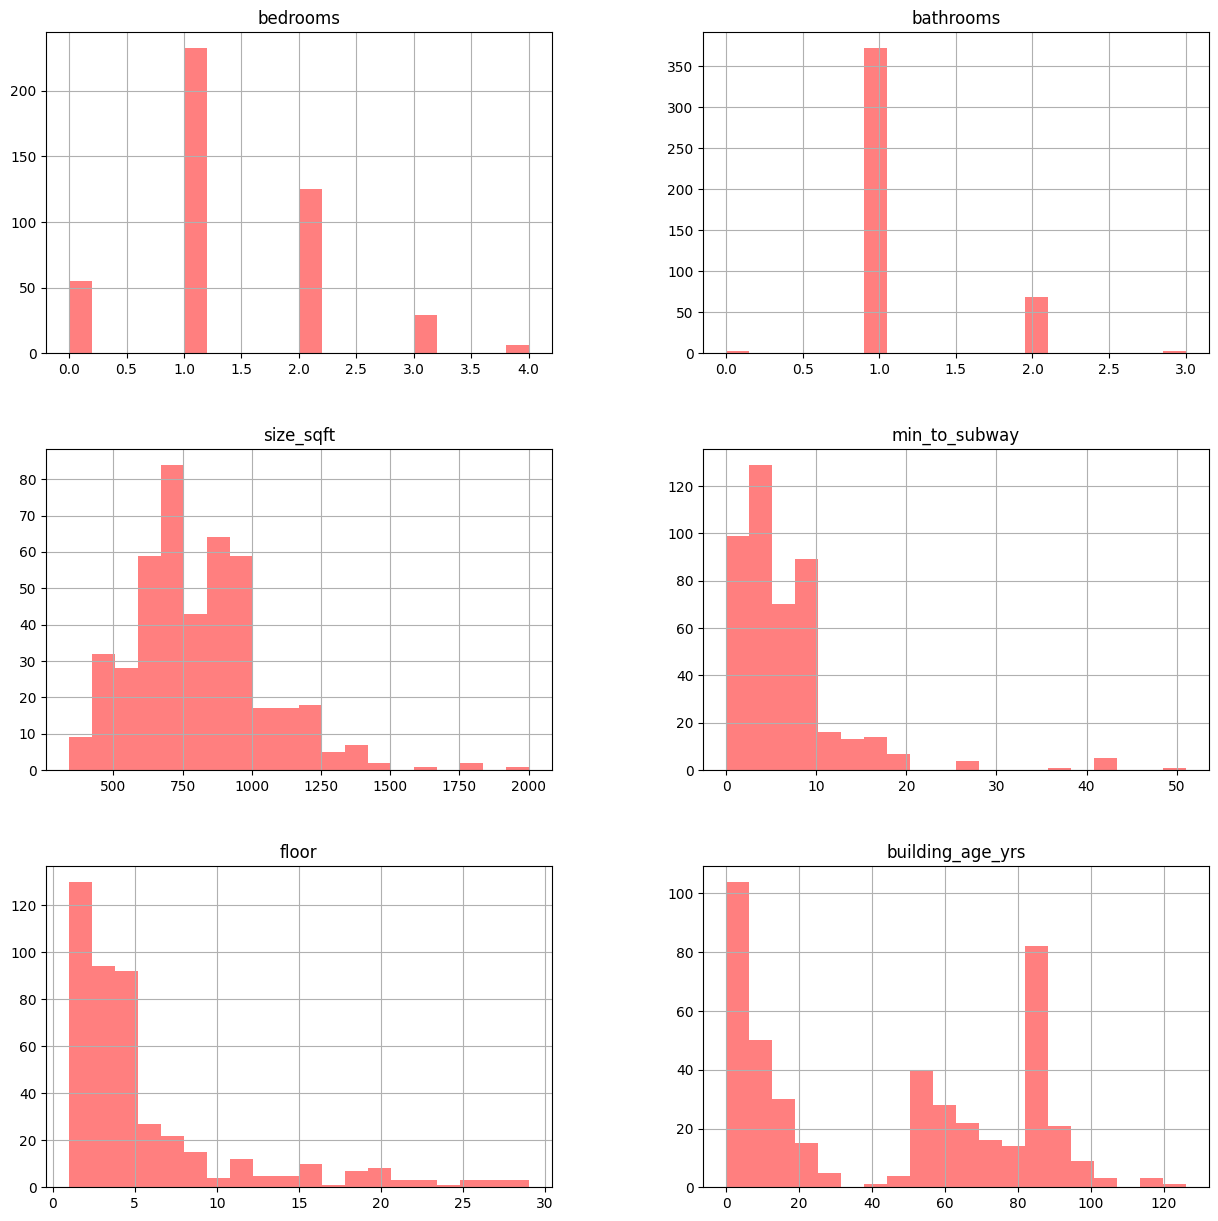

In [ ]:
numericColumns = ['bedrooms', 'bathrooms', 'size_sqft','min_to_subway','floor','building_age_yrs']

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15,15))

df[numericColumns].hist(bins = 20, color = 'red', alpha = 0.5, ax = ax)

plt.show()

## Countplot setiap feature KATEGORIKAL

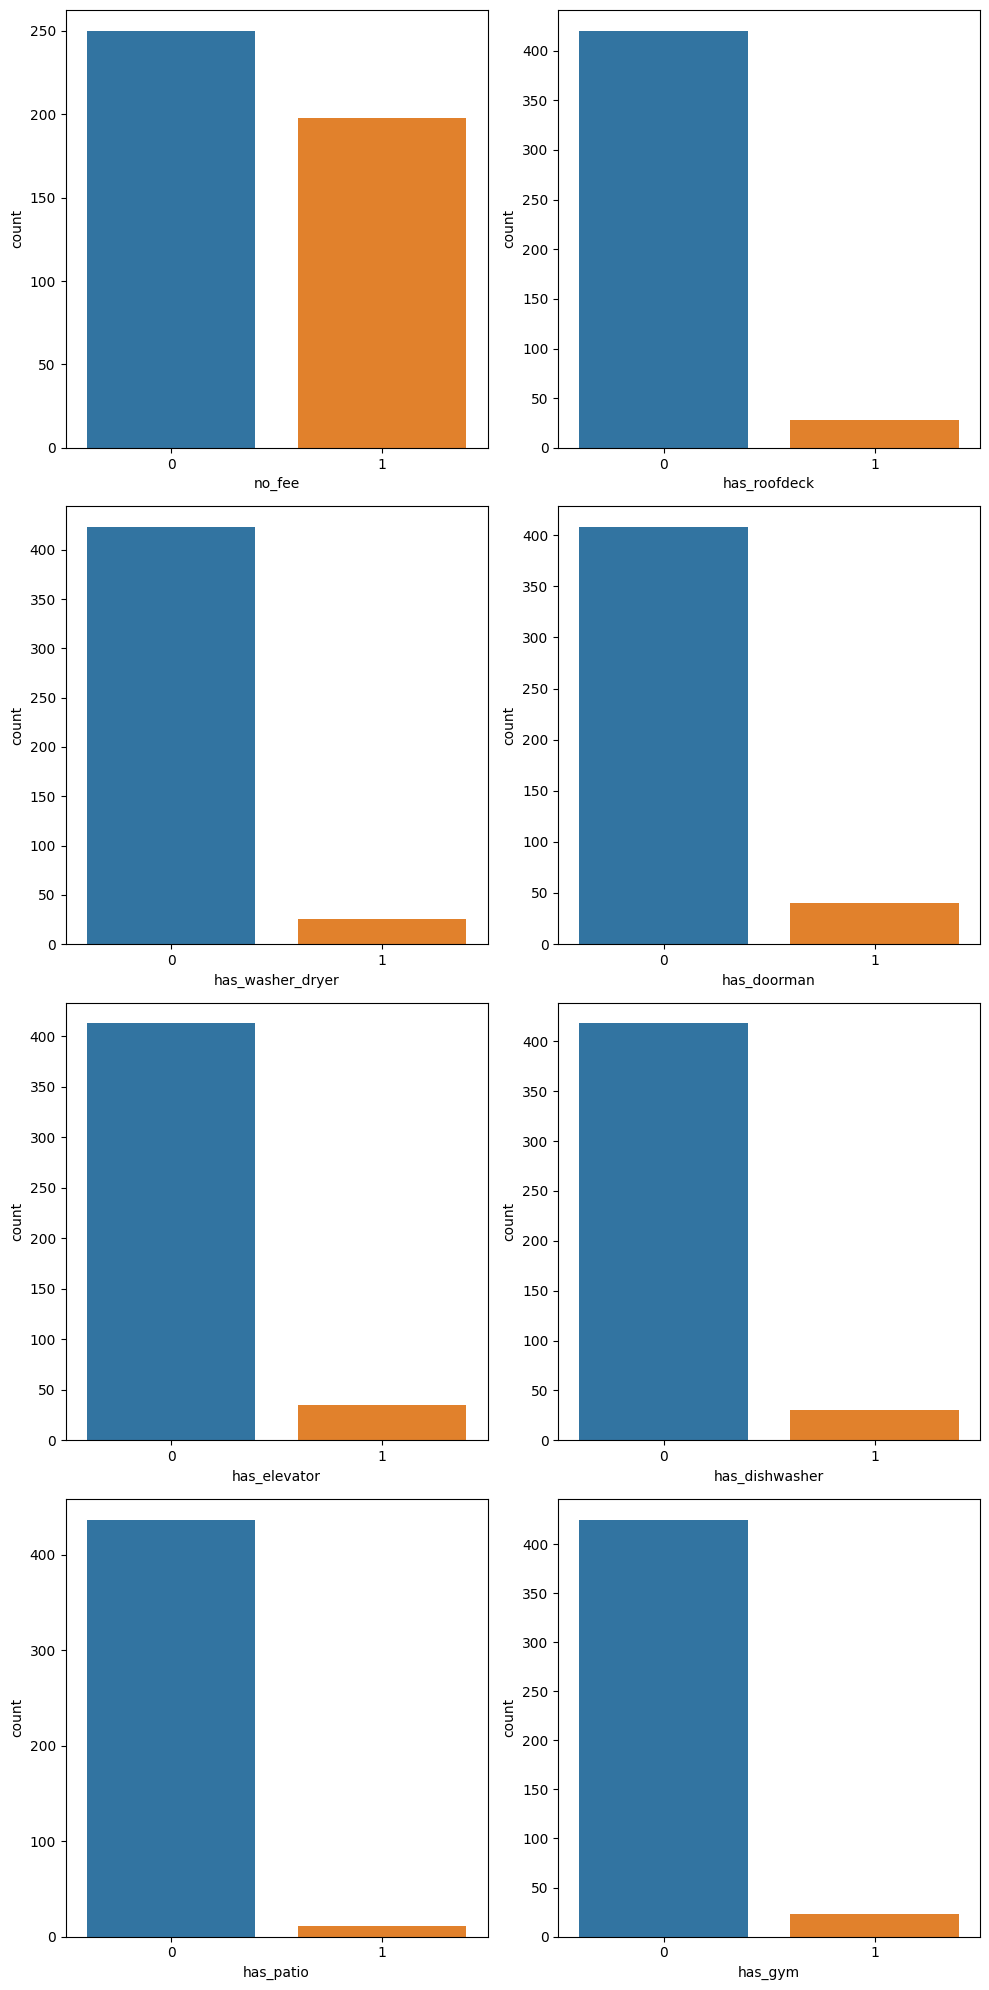

In [ ]:
# Membuat countplot setiap feature kategorikal

kolomKategorikal = ['no_fee','has_roofdeck','has_washer_dryer','has_doorman','has_elevator','has_dishwasher','has_patio','has_gym']

fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(10,20))

for i, column in enumerate(kolomKategorikal):
    sns.countplot(data=df, x=column, ax=axs[i // 2, i % 2])

plt.tight_layout()
plt.show()

## Visualisasi 5 Wilayah dengan Harga Sewa Termahal

In [ ]:
neighborhoodRent = df.groupby(["neighborhood"])["rent"].mean().sort_values(ascending=False)[:5].reset_index()

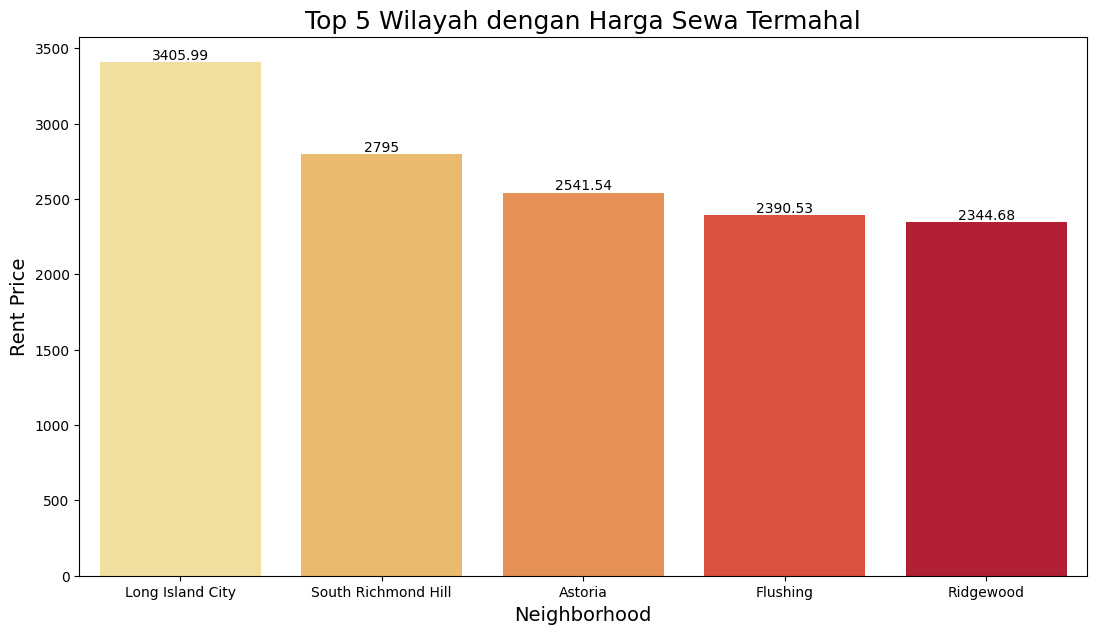

In [ ]:
# Menampilkan 5 neighborhood yang memiliki harga sewa termahal
plt.figure(figsize = (13,7))
ax = sns.barplot(data = neighborhoodRent, x = 'neighborhood', y = 'rent', palette='YlOrRd')
plt.title("Top 5 Wilayah dengan Harga Sewa Termahal", fontsize=18)
plt.xlabel('Neighborhood', fontsize=14)
plt.ylabel('Rent Price', fontsize=14)

# Untuk menampilkan nilai detail di atas bar
for i in ax.containers:
    ax.bar_label(i,)

## Drop kolom yang tidak diperlukan

In [ ]:
df.drop(columns='borough', inplace=True)
df.drop(columns='rental_id', inplace=True)

Kolom borough tidak digunakan karena isinya sama semua, yaitu 'Queens'. <br>
Kolom rental_id tidak digunakan karena isinya 100% unique sehingga akan mengganggu hasil prediksi.

In [ ]:
df.head()

,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood
0,3000,3,1,1000,4,1,106,0,0,0,0,0,0,0,0,Astoria
1,1950,1,1,950,1,3,83,0,0,0,0,0,0,0,0,Forest Hills
2,3500,1,1,996,9,7,3,1,0,0,0,0,0,0,0,Astoria
3,1725,1,1,800,1,2,89,0,0,0,0,0,0,0,0,Astoria
4,1700,1,1,730,10,3,7,0,0,0,0,0,0,0,0,Briarwood


## Melakukan normalisasi pada kolom yang belum terdistribusi normal

In [ ]:
df['building_age_yrs'] = np.log1p(df['building_age_yrs'])

In [ ]:
df.head()

,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood
0,3000,3,1,1000,4,1,4.672829,0,0,0,0,0,0,0,0,Astoria
1,1950,1,1,950,1,3,4.430817,0,0,0,0,0,0,0,0,Forest Hills
2,3500,1,1,996,9,7,1.386294,1,0,0,0,0,0,0,0,Astoria
3,1725,1,1,800,1,2,4.499810,0,0,0,0,0,0,0,0,Astoria
4,1700,1,1,730,10,3,2.079442,0,0,0,0,0,0,0,0,Briarwood


## Melakukan encoding pada kolom non-numerik

In [ ]:
df = pd.get_dummies(df, columns=['neighborhood'], drop_first=True)

# **Proses Modeling**
#### Membagi data menjadi X dan y
#### X adalah feature-feature yang digunakan
#### y adalah kolom yang akan kita prediksi, yaitu harga sewa

In [ ]:
X = df.drop(['rent'], axis = 1)
y = df['rent']

print(X.shape)
print(y.shape)

(448, 37)
(448,)


#### Melakukan Standarisasi

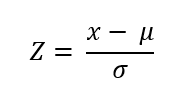

In [ ]:
# Fungsi untuk melakukan standarisasi
# Penjelasan parameter:
# df: dataframe yang akan distandarisasi
def standarisasi(df):
    return (df - df.mean()) / df.std()

In [ ]:
df.head()

,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,...,neighborhood_Oakland Gardens,neighborhood_Queens Village,neighborhood_Rego Park,neighborhood_Richmond Hill,neighborhood_Ridgewood,neighborhood_Rockaway All,neighborhood_South Richmond Hill,neighborhood_Sunnyside,neighborhood_Woodhaven,neighborhood_Woodside
0,3000,3,1,1000,4,1,4.672829,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1950,1,1,950,1,3,4.430817,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3500,1,1,996,9,7,1.386294,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1725,1,1,800,1,2,4.499810,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1700,1,1,730,10,3,2.079442,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Melakukan standarisasi pada setiap feature di X
X = standarisasi(X)

In [ ]:
X.head()

,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,...,neighborhood_Oakland Gardens,neighborhood_Queens Village,neighborhood_Rego Park,neighborhood_Richmond Hill,neighborhood_Ridgewood,neighborhood_Rockaway All,neighborhood_South Richmond Hill,neighborhood_Sunnyside,neighborhood_Woodhaven,neighborhood_Woodside
0,2.035317,-0.399258,0.786064,-0.421983,-0.820552,1.051783,-0.888950,-0.257911,-0.242837,-0.312762,...,-0.047246,-0.082015,-0.312762,-0.047246,-0.210215,-0.047246,-0.047246,-0.262789,-0.047246,-0.09481
1,-0.396208,-0.399258,0.577180,-0.883451,-0.465719,0.882682,-0.888950,-0.257911,-0.242837,-0.312762,...,-0.047246,-0.082015,-0.312762,-0.047246,-0.210215,-0.047246,-0.047246,-0.262789,-0.047246,-0.09481
2,-0.396208,-0.399258,0.769353,0.347131,0.243948,-1.244609,1.122412,-0.257911,-0.242837,-0.312762,...,-0.047246,-0.082015,-0.312762,-0.047246,-0.210215,-0.047246,-0.047246,-0.262789,-0.047246,-0.09481
3,-0.396208,-0.399258,-0.049470,-0.883451,-0.643135,0.930889,-0.888950,-0.257911,-0.242837,-0.312762,...,-0.047246,-0.082015,-0.312762,-0.047246,-0.210215,-0.047246,-0.047246,-0.262789,-0.047246,-0.09481
4,-0.396208,-0.399258,-0.341907,0.500954,-0.465719,-0.760288,-0.888950,-0.257911,-0.242837,-0.312762,...,-0.047246,-0.082015,-0.312762,-0.047246,-0.210215,-0.047246,-0.047246,-0.262789,-0.047246,-0.09481


#### Melakukan splitting data 
#### Data test sebesar 20% dan data training sebesar 80%

In [ ]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=92)
X_train.shape, X_test.shape

((358, 37), (90, 37))

### **Memodelkan Linear Regression**
##### Cost Formula
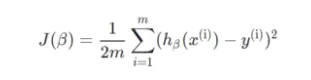

In [ ]:
# Fungsi untuk mencari cost
# Penjelasan parameter:
# X: features yang digunakan
# y: nilai yang akan diprediksi
# w: weight
# b: bias
def cost_function(X, y, w, b):
    cost = np.sum((((X.dot(w) + b) - y) ** 2) / (2*len(y)))
    return cost

##### Gradient Descent
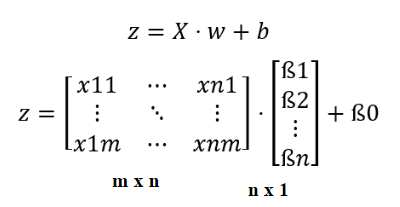
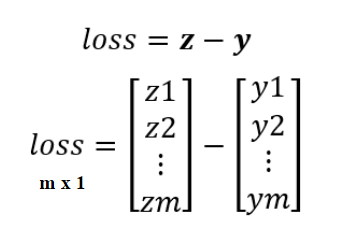
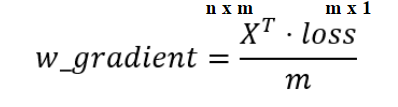
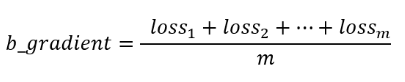
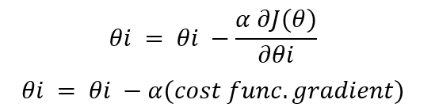

In [ ]:
# Fungsi gradient descent
# Penjelasan parameter:
# X: features yang digunakan
# y: nilai yang akan diprediksi
# w: weight
# b: bias
# alpha: learning rate
# epochs: jumlah iterasi
def gradient_descent_function(X, y, w, b, alpha=0.01, epochs=1000):
    m = len(y)
    costs = [0] * epochs
    
    for epoch in range(epochs):
        # Kalkulasi nilai z
        z = X.dot(w) + b
        
        # Menghitung loss
        loss = z - y
        
        # Menghitung gradient descent
        weight_gradient = X.T.dot(loss) / m
        bias_gradient = np.sum(loss) / m
        
        # Update nilai weight dan bias
        w = w - alpha*weight_gradient
        b = b - alpha*bias_gradient
        
        # Menyimpan nilai loss
        cost = cost_function(X, y, w, b)
        costs[epoch] = cost
        
    return w, b, costs

In [ ]:
# Inisialisasi random weight
w = np.random.randn(X_train.shape[1])
# Inisialisasi bias
b = 0
weights, bias, costs = gradient_descent_function(X_train, y_train, w, b, epochs=2000);

In [ ]:
# Menampilkan weights dan biasnya
print(weights)
print(bias)

bedrooms                            165.396700
bathrooms                           153.613961
size_sqft                           303.348677
min_to_subway                       -51.685630
floor                                79.307599
building_age_yrs                   -162.639828
no_fee                              116.648157
has_roofdeck                         19.867411
has_washer_dryer                     44.105392
has_doorman                          36.743893
has_elevator                         -9.462782
has_dishwasher                      -34.104395
has_patio                            39.161684
has_gym                             -14.207605
neighborhood_Briarwood              -56.354675
neighborhood_Corona                  12.952791
neighborhood_Elmhurst               -46.486447
neighborhood_Flushing               -31.466238
neighborhood_Forest Hills          -136.966727
neighborhood_Glendale               -34.653135
neighborhood_Jackson Heights        -27.839226
neighborhood_

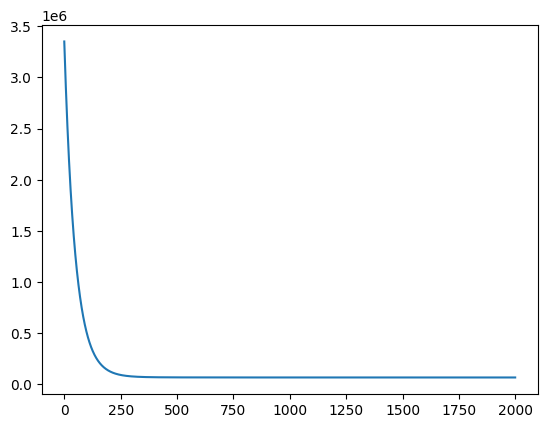

In [ ]:
# Memvisualisasikan costnya
plt.plot(costs)
plt.show()

Tampak bahwa costnya semakin berkurang menuju 0

In [ ]:
# Fungsi untuk memprediksi data berdasarkan feature X
# Penjelasan parameter:
# X: feature
# w: weight
# b: bias
def predict(X, w, b):
    return X.dot(w) + b

In [ ]:
# Melakukan prediksi terhadap X_test dan X_train
y_pred_test = predict(X_test, weights, bias)
y_pred_train = predict(X_train, weights, bias)

# **Evaluasi Model**
## Ada 4 jenis evaluasi yang kami gunakan:
## 1. R2 Score
## 2. Mean Absolute Error (MAE)
## 3. Root Mean Squared Error (RMSE)
## 4. Mean Absolute Percentage Error (MAPE)"

## **R2 Score**
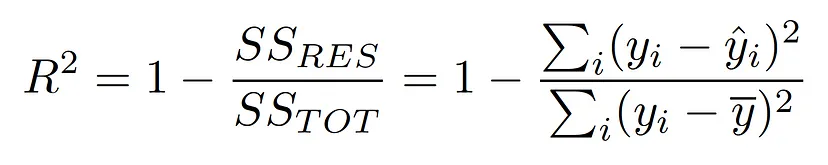

In [ ]:
# Fungsi untuk menghitung skor r2
# Tujuannya agar kita bisa tahu seberapa akurat model yang kita buat
# Penjelasan parameter:
# y_pred: value hasil prediksi
# y: value aktual
def r2score(y_pred, y):
    SSres = np.sum((y - y_pred) ** 2)
    SStot = np.sum((y - y.mean()) ** 2)
    
    r2 = 1 - (SSres / SStot)
    return r2

In [ ]:
r2_test = r2score(y_pred_test, y_test)
r2_train = r2score(y_pred_train, y_train)

In [ ]:
print(f"Skor R2 untuk data test = {r2_test}")
print(f"Skor R2 untuk data train = {r2_train}")

Skor R2 untuk data test = 0.7950306100967867
Skor R2 untuk data train = 0.8128076069157694


Tampak bahwa model ini balanced. Tidak underfitting dan tidak overfitting. <br>
Bisa kita lihat bahwa skor data test dan skor data train sangat mirip. <br> 
Selain itu, skornya pun sudah cukup baik, yaitu ada di sekitar 80%.

## **Mean Absolute Error (MAE)** <br>
MAE bertujuan untuk memeriksa seberapa jauh perbedaan antara harga sewa aktual dengan harga sewa hasil prediksi
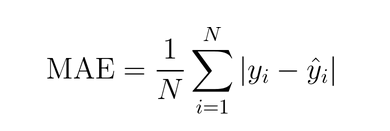

In [ ]:
# Fungsi untuk menghitung besar Mean Absolute Error
# Penjelasan parameter:
# y: value aktual
# y_pred: value hasil prediksi
def mean_absolute_error(y, y_pred):
    return np.mean(np.abs(y - y_pred))

In [ ]:
mae_test = mean_absolute_error(y_test, y_pred_test)
mae_train = mean_absolute_error(y_train, y_pred_train)

In [ ]:
print(f"Mean absolute error untuk data tes = {mae_test}")
print(f"Mean absolute error untuk data train = {mae_train}")

Mean absolute error untuk data tes = 293.23764102660203
Mean absolute error untuk data train = 243.5660407304566


Tampak bahwa rata-rata selisih antara harga sewa aktual dan harga sewa hasil prediksi hanya sebesar 293 dollar untuk data test dan 243 dollar untuk data train. Hal tersebut menunjukkan bahwa error yang terjadi tidak terlalu besar dalam konteks harga sewa bangunan.

## **Root Mean Squared Error (RMSE)**
RMSE bertujuan untuk menghitung akar kuadrat kesalahan antara harga sewa aktual dengan harga sewa hasil prediksi
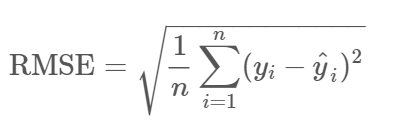

In [ ]:
# Fungsi untuk menghitung besar Mean Absolute Error
# Penjelasan parameter:
# y: value aktual
# y_pred: value hasil prediksi
def root_mean_squared_error(y, y_pred):
    return np.sqrt(np.mean((y - y_pred)**2))

In [ ]:
rmse_test = root_mean_squared_error(y_test, y_pred_test)
rmse_train = root_mean_squared_error(y_train, y_pred_train)

In [ ]:
print(f"Root mean squared error untuk data tes = {rmse_test}")
print(f"Root mean squared error untuk data train = {rmse_train}")

Root mean squared error untuk data tes = 409.0727709699441
Root mean squared error untuk data train = 361.8778962759095


Tampak bahwa RMSE untuk data tes adalah 409 dollar dan RMSE untuk data train sebesar 361 dollar. Hal tersebut membuktikan bahwa model mampu memprediksi harga sewa dengan baik karena besar errornya yang minim.

## **Mean Absolute Percentage Error (MAPE)**
MAPE bertujuan untuk menghitung rata-rata persentase error antara harga sewa aktual dengan harga sewa hasil prediksi
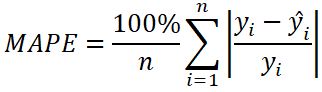

In [ ]:
# Fungsi untuk menghitung Mean Absolute Percentage Error
# Penjelasan parameter:
# y: value aktual
# y_pred: value hasil prediksi
def mean_absolute_percentage_error(y, y_pred):
    # Konversi ke array
    actual = np.array(y)
    predicted = np.array(y_pred)
    
    # Perhitungan MAPE
    abs_percentage_error = np.abs((actual - predicted) / actual)
    mape = np.mean(abs_percentage_error) * 100
    
    return mape

In [ ]:
mape_test = round(mean_absolute_percentage_error(y_test, y_pred_test), 2)
mape_train = round(mean_absolute_percentage_error(y_train, y_pred_train), 2)

In [ ]:
print(f"Mean absolute percentage error untuk data tes = {mape_test} %")
print(f"Mean absolute percentage error untuk data train = {mape_train} %")

Mean absolute percentage error untuk data tes = 11.7 %
Mean absolute percentage error untuk data train = 9.91 %


Tampak bahwa persentase error pada antara harga sewa aktual dengan harga sewa hasil prediksi hanya sekitar 10 persen. Hal tersebut menunjukkan bahwa model dapat memprediksi harga sewa dengan baik.

# **Kesimpulan**
* Terbukti bahwa projek ini mampu mengimplementasikan tema money (prediksi harga) dan investment (investasi real estate) yang dapat membantu para penyewa dan investor untuk mencari bangunan yang diinginkan. <br><br>
* Terbukti bahwa penggunaan model linear regression yang dipadukan dengan gradient descent berhasil diterapkan pada prediksi harga sewa bangunan di dataset ini. <br><br>
* Terbukti pula bahwa model yang dibuat mampu menghasilkan hasil prediksi harga sewa yang cukup akurat. Hal tersebut sudah dibuktikan dengan berbagai jenis evaluasi yang kami lakukan.


# **Terima kasih atas perhatiannya.**